In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import plotly.express as px
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [255]:
df = pd.read_csv("/Users/scharlottej13/Nextcloud/linkedin_recruiter/inputs/model_input.csv")
df['Direction'] = df['country_orig'] + ' to ' + df['country_dest']

In [280]:
orig = 'pol'
df = pd.read_csv("/Users/scharlottej13/Nextcloud/linkedin_recruiter/inputs/model_input.csv")
keep_isos = list(
        df.query(f"iso3_orig == '{orig}'").groupby(
            'iso3_dest'
        )['flow'].count().iloc[lambda x: x.values == 14].index
    )
df = df.query(f"iso3_orig == '{orig}' & iso3_dest in {keep_isos}").assign(
    prop=df['flow'] / df['users_orig'],
    cutoff=lambda x: pd.cut(
        x['prop'], [0, .0002, .0006, .001, 1], labels=False)
).sort_values(by=['query_date', 'prop'], ascending=[True, False])

In [339]:
df = pd.read_csv("/Users/scharlottej13/Nextcloud/linkedin_recruiter/inputs/model_input.csv")
df = df.query(f"iso3_orig == '{orig}'").assign(
    prop=df['flow'] / df['users_orig']
).sort_values(by=['query_date', 'prop'], ascending=[True, False])

In [341]:
df.groupby('query_date')['prop'].sum().mean()

0.014759783621359882

In [342]:
df.groupby('query_date')['flow'].sum().mean()

52778.642857142855

In [345]:
df.drop_duplicates('users_orig')['users_orig'].mean()

3578337.714285714

In [346]:
.015 * 3578337

53675.055

In [330]:
df.country_orig.values[0]

'Poland'

In [56]:
isos = ['pol', 'deu', 'gbr']
x = df[
    (df['iso3_dest'].isin(isos)) & (df['iso3_orig'].isin(isos))
]

In [51]:
def line_plt(df):
    plt.figure(figsize=(10,10))
    ax = sns.lineplot(
        data=df, x=df['query_date'], y=df['flow'],
        hue=df['Direction'], style=df['Direction']
    )
    ax.set_xticklabels(df['query_date'].unique(), rotation=45, horizontalalignment='right')
    ticks_loc = ax.get_yticks().tolist()
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.xlabel('Date of Data Collection')
    # plt.ylabel('Country')
    # plt.title('"Zoomed in" Top 6 destination countries (without US), by number of people open to relocation')

In [52]:
def line_plt2(df):
    plt.figure(figsize=(10,10))
    ax = sns.lineplot(
        data=df, x=df['query_date'], y=df['users_dest'],
        hue=df['country_dest'], style=df['country_dest']
    )
    ax.set_xticklabels(df['query_date'].unique(), rotation=45, horizontalalignment='right')
    ticks_loc = ax.get_yticks().tolist()
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in ticks_loc])
    plt.legend(title='Destination Country', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.xlabel('Date of Data Collection')
    # plt.ylabel('Country')
    # plt.title('"Zoomed in" Top 6 destination countries (without US), by number of people open to relocation')

In [187]:
def line_plt3(df):
    df = df.assign(prop=df['flow'] / df['users_orig']).sort_values(
        by=['query_date', 'prop'], ascending=[True, False])

    fig, ax = plt.subplots(figsize=(10,5))
    sns.lineplot(
        'query_date',
        'prop',
        hue='country_dest',
        style='country_dest',
        marker='o',
        data=df,
        ax=ax
    )

    # make adjustments
    ax.set_xticklabels(df['query_date'].unique(), rotation=45, horizontalalignment='right')
    ax.set_xlabel('Date of Data Collection')
    ax.set_yticklabels(["{:.2%}".format(x) for x in ax.get_yticks().tolist()])
    ax.set_ylabel('Percent Open to Relocation')

    ax.text(x=0.5, y=1.1, s='LinkedIn Users in Poland Open to Relocation', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    ax.text(x=0.5, y=1.03, s='on average 9.4% of people in Poland use LinkedIn (n=3,578,338)', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

    h,l = ax.get_legend_handles_labels()
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Destination Country', frameon=False, ncol=2)

    fig.tight_layout()
    plt.show()

In [107]:
keep_isos = list(df.query("iso3_orig == 'pol'").groupby('iso3_dest')['prop_orig'].count().iloc[lambda x: x.values == 14].index)

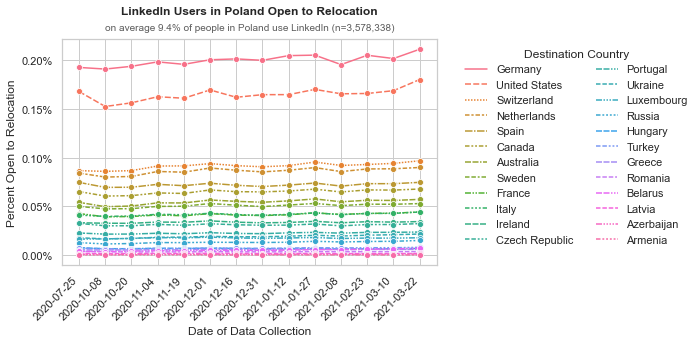

In [188]:
line_plt3(df.query(f"iso3_orig == 'pol' & iso3_dest in {keep_isos}"))

In [323]:
def line_plt_facet(df):    
    num_cols = len(df.cutoff.unique())
    fig, axs = plt.subplots(2, 2)
    for ax in fig.get_axes():
        sns.lineplot(
            'query_date',
            'prop',
            hue='country_dest',
            style='country_dest',
            marker='o',
            data=df[df['cutoff'] == 1],
            ax=ax)
        ax.label_outer()

        # make adjustments
        ax.set_xticklabels(df['query_date'].unique(), rotation=45, horizontalalignment='right')
        # ax.set_xlabel('Date of Data Collection')
        ax.set_yticklabels(["{:.2%}".format(x) for x in ax.get_yticks().tolist()])
        ax.set_ylabel('Percent Open to Relocation')
        
#         h,l = ax.get_legend_handles_labels()
#         ax.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Destination Country', frameon=False, ncol=2)
    
    fig.tight_layout()
    fig.text(x=0.5, y=1.1, s='LinkedIn Users in Poland Open to Relocation', fontsize=12, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
    fig.text(x=0.5, y=1.03, s='on average 9.4% of people in Poland use LinkedIn (n=3,578,338)', fontsize=10, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
    plt.show()

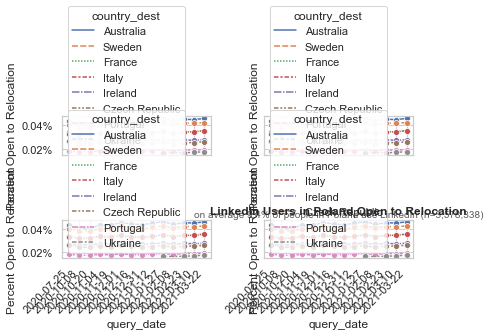

In [324]:
line_plt_facet(df.query(f"iso3_orig == 'pol' & iso3_dest in {keep_isos}"))

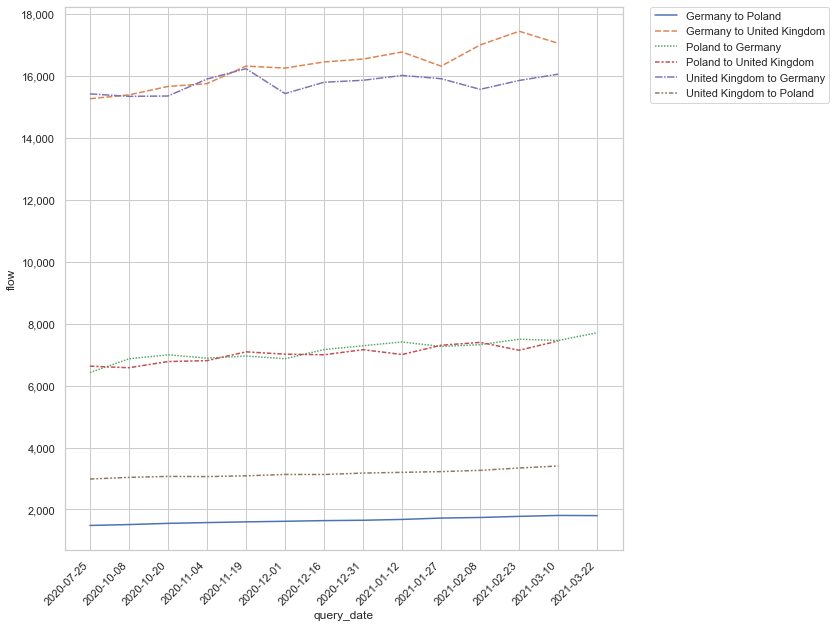

In [20]:
line_plt(x)

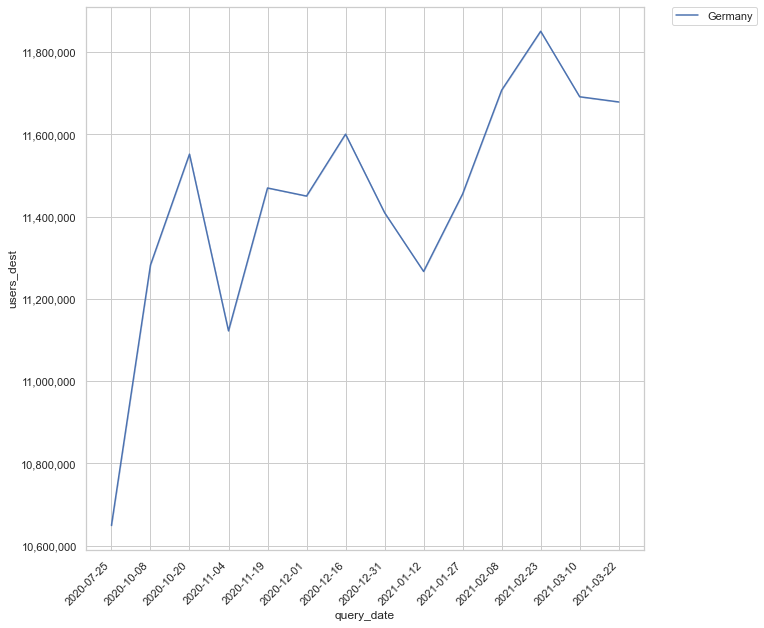

In [42]:
line_plt2(x.query('iso3_dest == "deu"'))

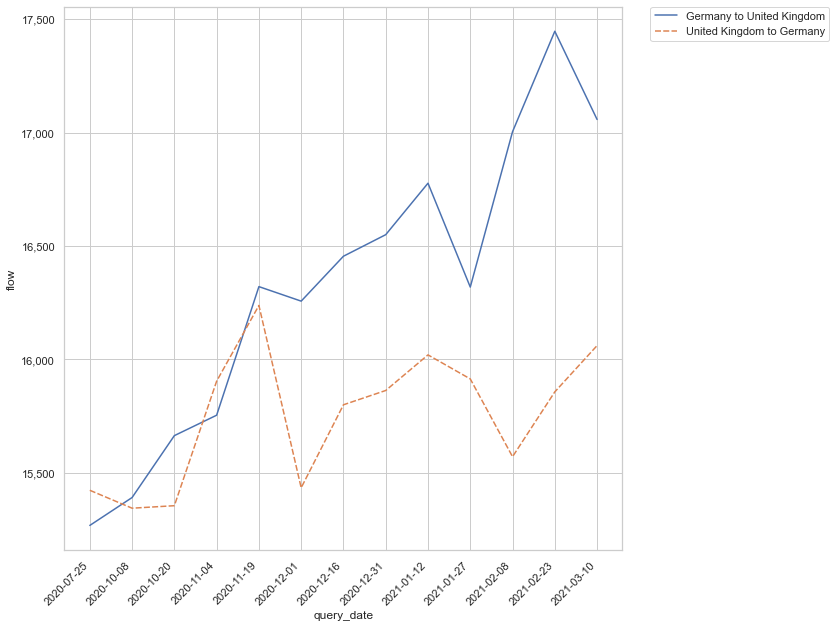

In [19]:
line_plt(x.query('flow > 14000'))

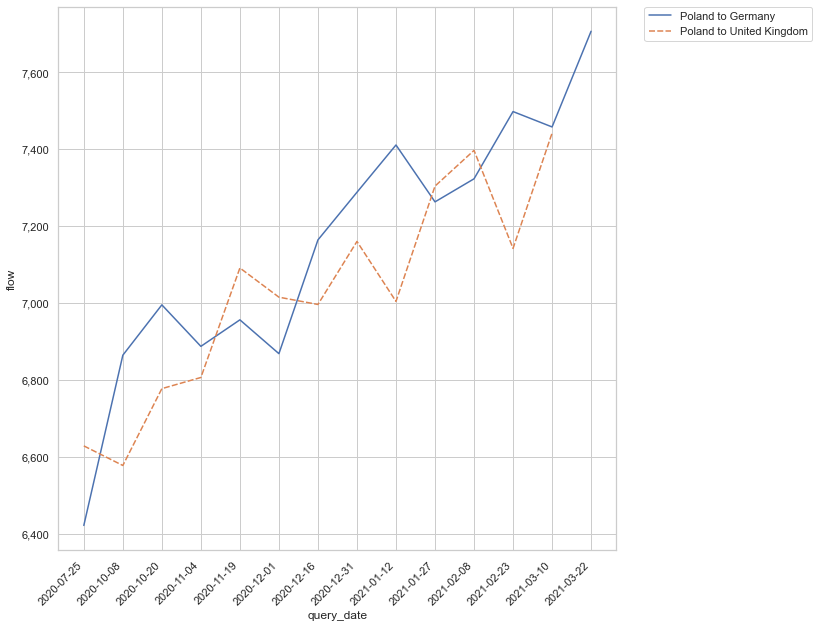

In [21]:
line_plt(x.query('flow < 14000 & flow > 6000'))

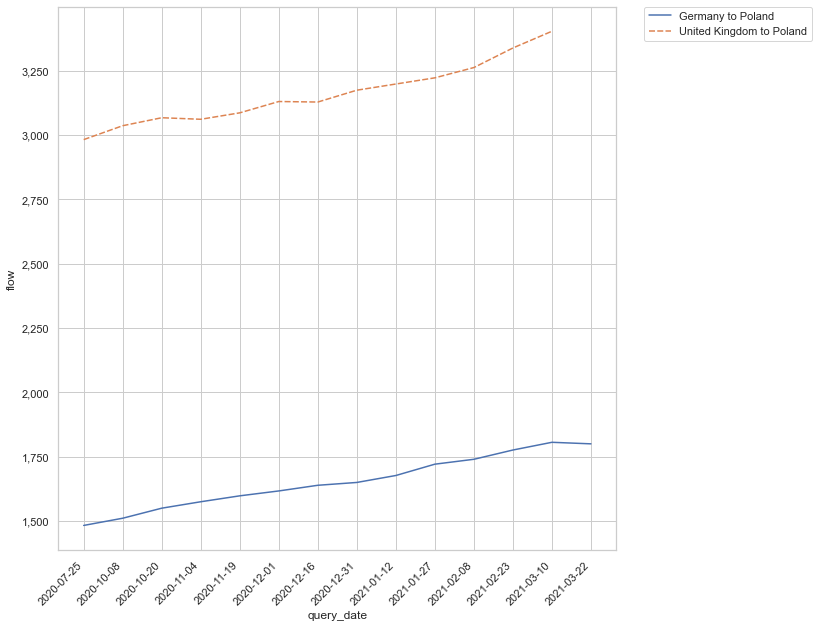

In [22]:
line_plt(x.query('flow < 4000'))

In [26]:
isos = ['esp', 'deu', 'gbr', 'usa']
x = df[
    (df['iso3_dest'].isin(isos)) & (df['iso3_orig'].isin(isos))
]
x['Direction'] = x['country_orig'] + ' to ' + x['country_dest']
x = x.sort_values(by=['query_date', 'Direction'], ascending=[True, True])

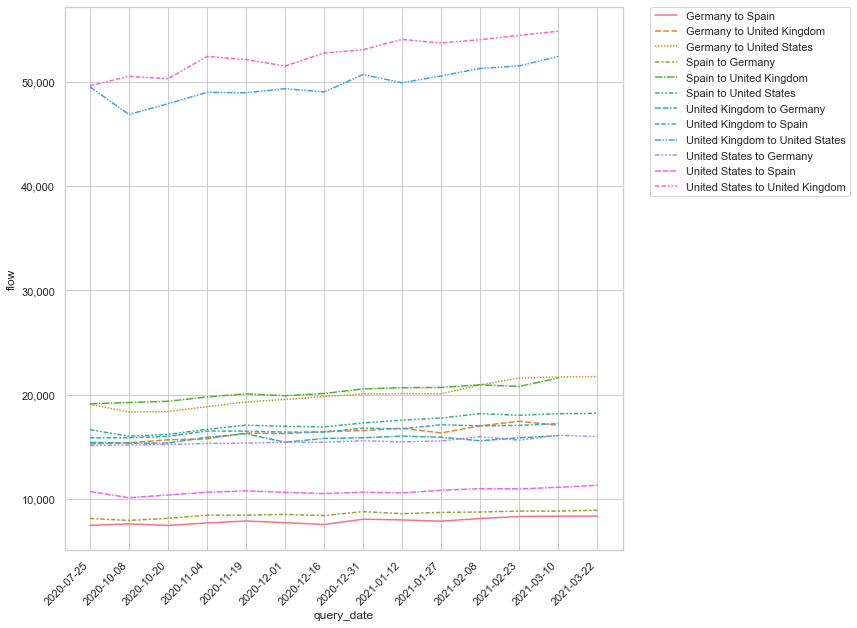

In [27]:
line_plt(x)

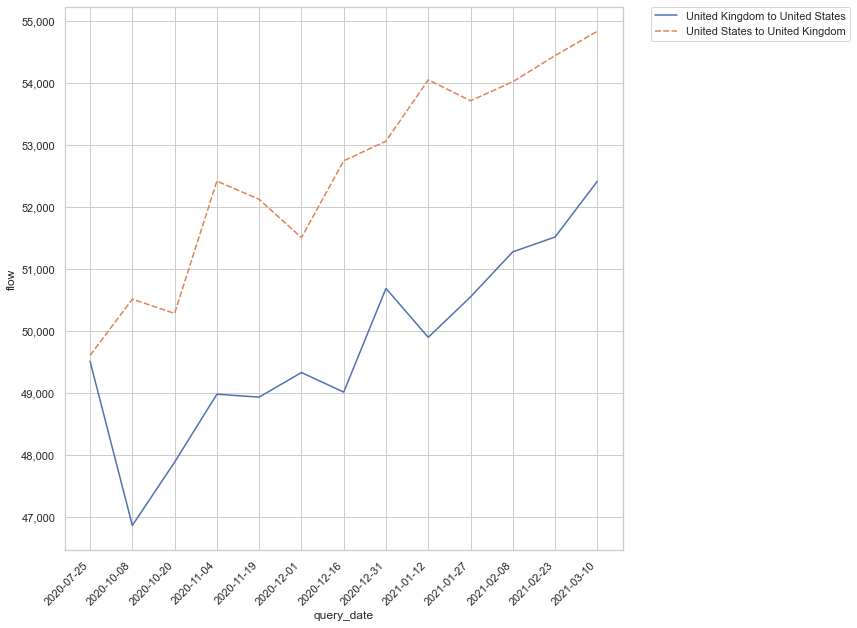

In [28]:
line_plt(x.query('flow > 45000'))

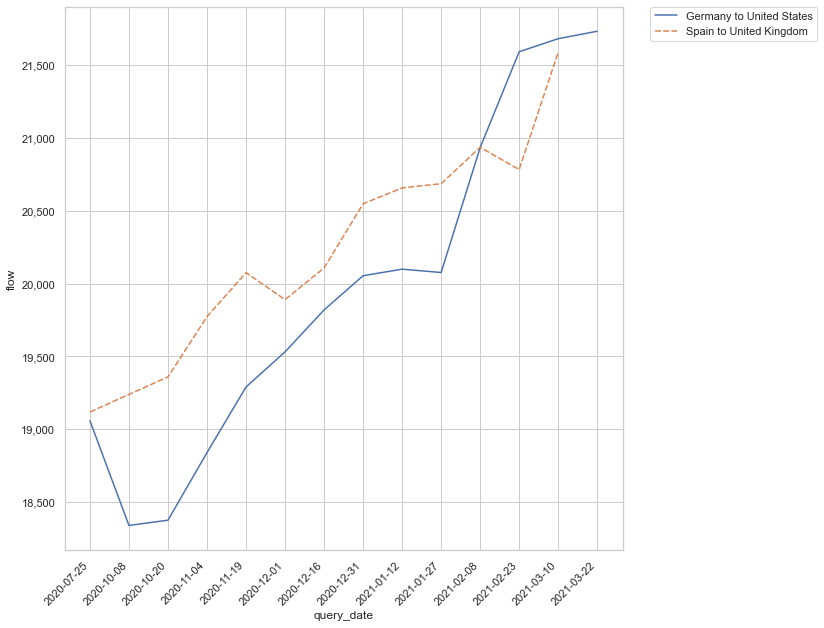

In [32]:
line_plt(x.query('flow < 30000 & flow > 18300'))

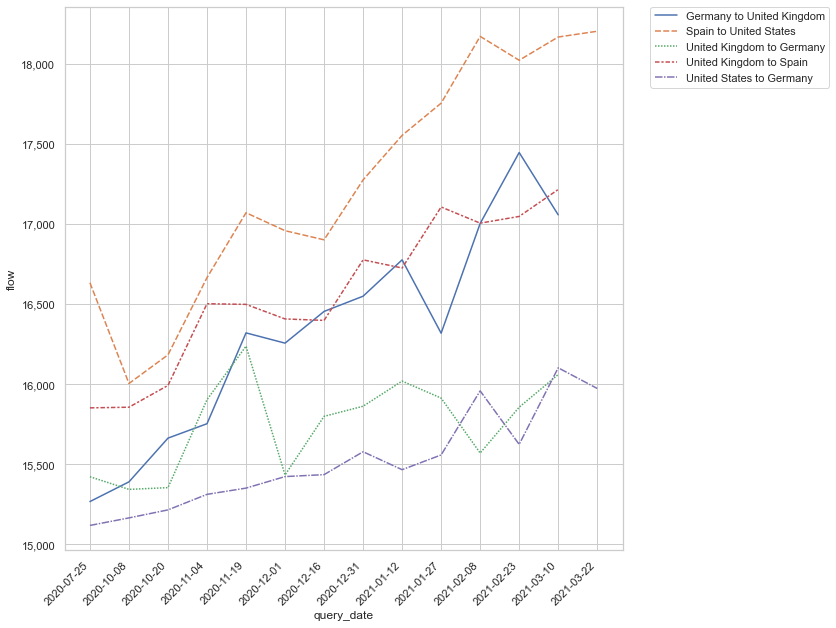

In [36]:
line_plt(x.query('flow < 18300 & flow > 12000'))